In [122]:
# Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,7)
import scipy
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency

In [123]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [124]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [125]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [126]:
df.shape

(7043, 21)

In [127]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [129]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [130]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [131]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [132]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [133]:
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [134]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [135]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [136]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [137]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [138]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [139]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Text(0.5, 1.0, 'countplot of Churn')

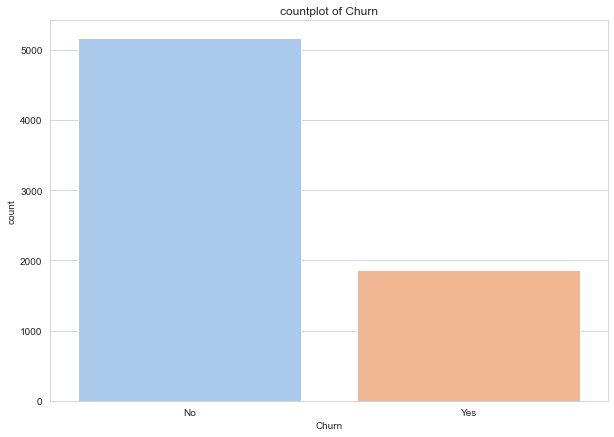

In [140]:
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.countplot(df.Churn, palette = 'pastel')
plt.title('countplot of Churn')

In [141]:
df.tenure.dtype

dtype('int64')

In [142]:
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

<Figure size 720x504 with 0 Axes>

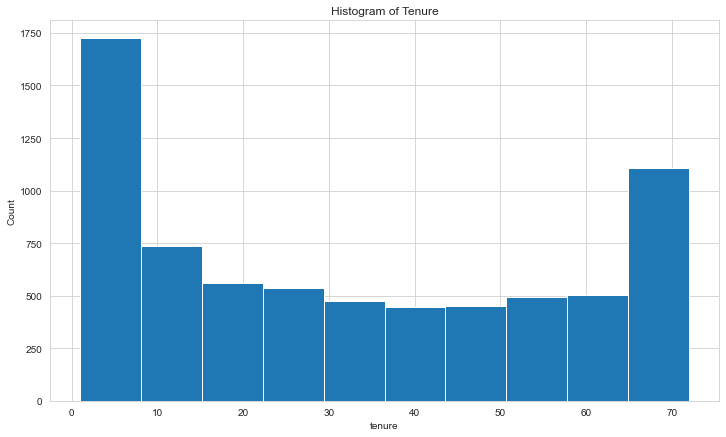

<Figure size 720x504 with 0 Axes>

In [143]:
plt.hist(df.tenure)
plt.xlabel('tenure', fontweight = 'regular')
plt.ylabel('Count', fontweight = 'regular')
plt.title('Histogram of Tenure', fontweight = 'regular')
plt.figure(figsize=(10,7))

Text(0.5, 1.0, 'Distribution of tenure')

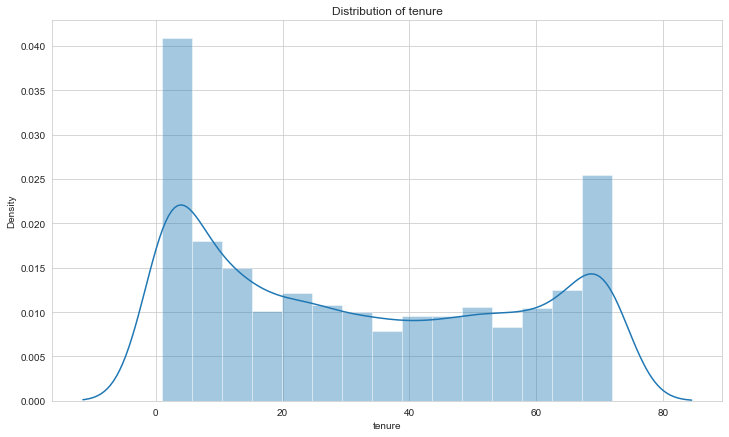

In [144]:
sns.set_style('whitegrid')
sns.distplot(df.tenure)
plt.title('Distribution of tenure')

Text(0.5, 1.0, 'Boxplot of tenure')

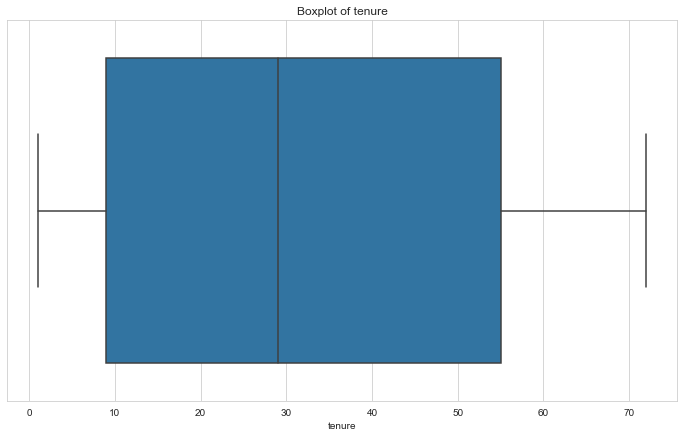

In [145]:
sns.boxplot(df.tenure)
plt.title('Boxplot of tenure')

In [146]:
df.tenure.describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

Text(0.5, 1.0, 'Tenure vs Churn Boxplot')

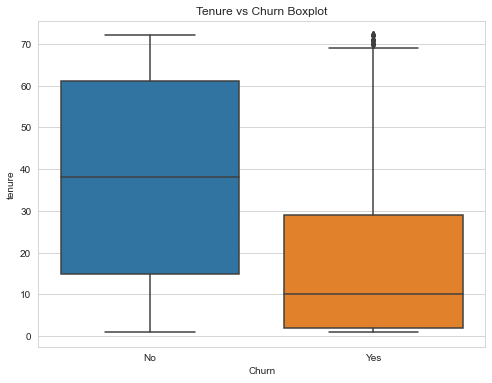

In [147]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='tenure', data = df)
plt.title('Tenure vs Churn Boxplot')

In [148]:
df.tenure.groupby(df.Churn).describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5163.0,37.650010,24.076940,1.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


In [149]:
df.tenure.groupby(df.Churn).mean()

Churn
No     37.650010
Yes    17.979133
Name: tenure, dtype: float64

 Hypothesis test :

In [150]:
df_churn0 = df[df.Churn == 0]
df_churn1 = df[df.Churn == 1]
scipy.stats.ttest_ind(df_churn0.tenure, df_churn1.tenure)

Ttest_indResult(statistic=nan, pvalue=nan)

# x2 - Phone Service

In [151]:
df.PhoneService.dtype

dtype('O')

In [152]:
df.PhoneService.value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [153]:
df['PhoneService'] = df['PhoneService'].replace('Yes', 1)
df['PhoneService'] = df['PhoneService'].replace('No', 0)

In [154]:
df['PhoneService'] = df['PhoneService'].astype('category')

Text(0.5, 1.0, 'countplot of PhoneService')

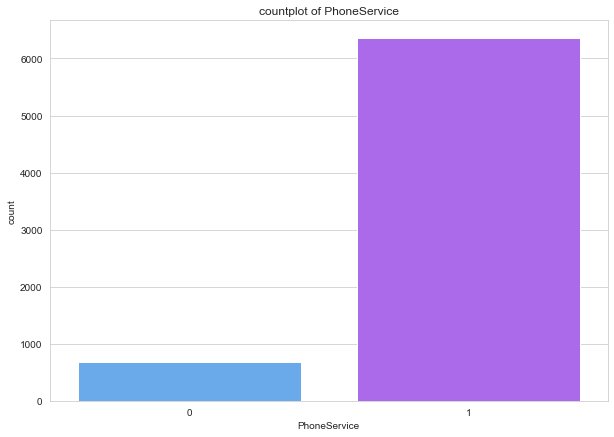

In [155]:
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.countplot(df.PhoneService, palette = 'cool')
plt.title('countplot of PhoneService')

Text(0.5, 1.0, 'Countplot of Phone service vs Churn')

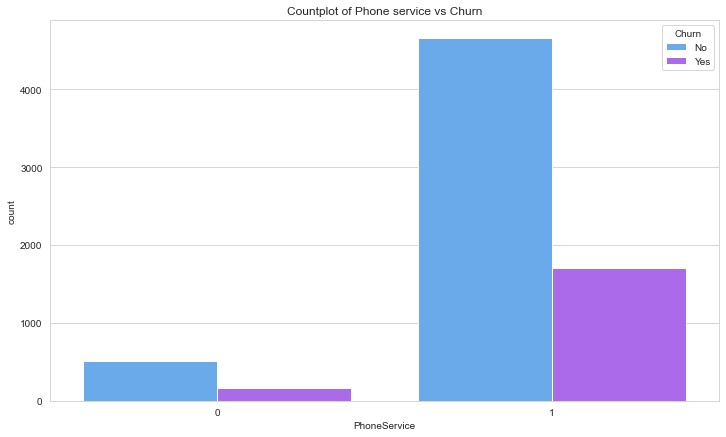

In [156]:
sns.countplot(df.PhoneService, hue=df.Churn, palette = 'cool')
plt.title('Countplot of Phone service vs Churn')

In [ ]:
sns.catplot(x='Churn', y='PhoneService', kind='swarm', data=df)
plt.title('Phone service vs churn')

# Hypothesis test :

In [ ]:
ct_phones = pd.crosstab(df.PhoneService, df.Churn)
ct_phones

In [ ]:
chi2_contingency(ct_phones, correction = False)

# x3 - Contract

In [ ]:
df.Contract.dtype

In [ ]:
df.Contract.value_counts()

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(df.Contract, palette = 'summer')
plt.title('countplot of Contract')

In [ ]:
sns.countplot(df.Contract, hue=df.Churn, palette = 'summer')
plt.title('Countplot of Contract vs Churn')

In [ ]:
df['Contract'] = df['Contract'].replace('Month-to-month', 0)
df['Contract'] = df['Contract'].replace('One year', 1)
df['Contract'] = df['Contract'].replace('Two year', 2)

In [ ]:
df['Contract'] = df['Contract'].astype('category')

# Hypothesis test :

In [ ]:
ct_contract = pd.crosstab(df.Contract, df.Churn)
ct_contract

In [ ]:
chi2_contingency(ct_contract, correction = False)

# x5 - Payment method

In [ ]:
df.PaymentMethod.dtype

In [ ]:
df.PaymentMethod.value_counts()

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(df.PaymentMethod, palette = 'autumn')
plt.title('countplot of PaymentMethod')

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(df.PaymentMethod, hue=df.Churn, palette = 'autumn')
plt.title('Countplot of PaymentMethod vs Churn')

# Hypothesis test :

In [ ]:
ct_PaymentMethod = pd.crosstab(df.PaymentMethod, df.Churn)
ct_PaymentMethod

In [ ]:
chi2_contingency(ct_PaymentMethod, correction = False)

In [ ]:
df['PaymentMethod'] = df['PaymentMethod'].replace('Bank transfer (automatic)', 1)
df['PaymentMethod'] = df['PaymentMethod'].replace('Credit card (automatic)', 2)
df['PaymentMethod'] = df['PaymentMethod'].replace('Electronic check', 3)
df['PaymentMethod'] = df['PaymentMethod'].replace('Mailed check', 4)

In [ ]:
df['PaymentMethod'] = df['PaymentMethod'].astype('category')

# x6 - Monthly charges

In [ ]:
df.MonthlyCharges.dtype

In [ ]:
df.MonthlyCharges.value_counts()

In [ ]:
plt.hist(df.MonthlyCharges, color = 'maroon')
plt.xlabel('MonthlyCharges', fontweight = 'book')
plt.ylabel('Count', fontweight = 'book')
plt.title('Histogram of MonthlyCharges', fontweight = 'book')
plt.figure(figsize=(10,7))

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,7))
sns.distplot(df.MonthlyCharges, color = 'maroon')
plt.title('Distribution of MonthlyCharges')

In [ ]:
sns.boxplot(df.MonthlyCharges, color = 'maroon')
plt.title('Boxplot of MonthlyCharges')

In [ ]:
df.MonthlyCharges.describe()

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data = df)
plt.title('MonthlyCharges vs Churn Boxplot')

In [ ]:
df.MonthlyCharges.groupby(df.Churn).describe()

In [ ]:
df.MonthlyCharges.groupby(df.Churn).mean()

# Hypothesis test :

In [ ]:
df_churn0 = df[df.Churn == 0]
df_churn1 = df[df.Churn == 1]
scipy.stats.ttest_ind(df_churn0.MonthlyCharges, df_churn1.MonthlyCharges)

# x7 - Total Charges

In [ ]:
df.TotalCharges.dtype

In [ ]:
df.TotalCharges.value_counts()

In [ ]:
plt.hist(df.TotalCharges, color = 'purple')
plt.xlabel('TotalCharges', fontweight = 'book')
plt.ylabel('Count', fontweight = 'book')
plt.title('Histogram of TotalCharges', fontweight = 'book')
plt.figure(figsize=(10,7))

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,7))
sns.distplot(df.TotalCharges, color = 'purple')
plt.title('Distribution of TotalCharges')

# Hypothesis test:

In [ ]:
df_churn0 = df[df.Churn == 0]
df_churn1 = df[df.Churn == 1]
scipy.stats.ttest_ind(df_churn0.TotalCharges, df_churn1.TotalCharges)

In [ ]:
del df['TotalCharges']

In [ ]:
del df['customerID']

In [ ]:
del df['PhoneService']

In [ ]:
df.info()

# Model Building

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x = df.iloc[:, :5]

In [ ]:
x.info()

In [ ]:
x = scaler.fit_transform(x)

In [ ]:
y = df.loc[:, 'Churn']

In [ ]:
y.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=45)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

In [ ]:
pred = model.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, pred))

In [ ]:
cm_table= pd.crosstab(y_test, pred, rownames=["Actual"], colnames=["Predicted"], margins=True)
cm_table

In [ ]:
from sklearn import metrics

In [ ]:
fpr, tpr, thresholds=  metrics.roc_curve(y_test, pred)
fpr
tpr
thresholds

In [ ]:
df1=pd.DataFrame(dict(fpr=fpr, tpr=tpr))
df1

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
auc=auc(fpr, tpr)
auc

In [ ]:
plt.figure()
lw=2
plt.plot(fpr, tpr, color='Blue', lw=lw, label= "roc curve (area= %0.2f)"%auc)
plt.plot([0,1], [0,1], color='Red', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc Eg")
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)